In [ ]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn


In [26]:
import os
import pandas as pd

# Path to the folder containing CSV files
data_folder = "/content"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Load and merge all CSV files
dataframes = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    print(f"Loading: {file_path}")
    df = pd.read_csv(file_path, low_memory=False)  # Avoid memory issues
    dataframes.append(df)

# Concatenate all dataframes into one
merged_df = pd.concat(dataframes, ignore_index=True)

# Display the merged dataset shape
print("Merged Dataset Shape:", merged_df.shape)

# Save merged dataset as CSV for future use
merged_df.to_csv("merged_CIC_IDS2017.csv", index=False)


Loading: /content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: /content/Tuesday-WorkingHours.pcap_ISCX.csv
Loading: /content/Wednesday-workingHours.pcap_ISCX.csv
Loading: /content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: /content/Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: /content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: /content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: /content/Monday-WorkingHours.pcap_ISCX.csv
Merged Dataset Shape: (105964, 79)


In [27]:
import pandas as pd
import numpy as np

# Load dataset (Change 'your_dataset.csv' to your actual file)
df = pd.read_csv("merged_CIC_IDS2017.csv", low_memory=False)

# Display the first few rows
print(df.head())

# Check dataset shape (rows, columns)
print("Dataset shape:", df.shape)

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                389       113095465                  48   
1                389       113473706                  68   
2                  0       119945515                 150   
3                443        60261928                   9   
4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                 

In [28]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Display columns with missing values
print(missing_counts[missing_counts > 0])



Flow Bytes/s     23
 Flow IAT Max     1
 Flow IAT Min     1
Fwd IAT Total     1
 Fwd IAT Mean     1
                 ..
Idle Mean         7
 Idle Std         8
 Idle Max         8
 Idle Min         8
 Label            8
Length: 62, dtype: int64


In [29]:
# Drop columns where more than 40% values are missing
df.dropna(thresh=len(df) * 0.6, axis=1, inplace=True)


In [30]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [31]:
df.to_csv("cleaned_CIC_IDS2017.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [32]:
print("Remaining Missing Values:\n", df.isnull().sum().sum())  # Should print 0 if all are handled


Remaining Missing Values:
 274


In [33]:
# Display columns with missing values
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


Flow Bytes/s     23
Flow IAT Max      1
Flow IAT Min      1
Fwd IAT Total     1
Fwd IAT Mean      1
                 ..
Idle Mean         7
Idle Std          8
Idle Max          8
Idle Min          8
Label             8
Length: 62, dtype: int64


In [34]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Only apply to numerical columns
        df.fillna(df.mean(numeric_only=True), inplace=True)


In [36]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [37]:
df.to_csv("cleaned_CIC_IDS2017.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [38]:
print("Remaining Missing Values:\n", df.isnull().sum().sum())  # Should print 0 if all are handled


Remaining Missing Values:
 8


In [39]:
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]

print("Columns with remaining missing values:\n", missing_cols)


Columns with remaining missing values:
 Label    8
dtype: int64


In [40]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [41]:
print("Remaining Missing Values:", df.isnull().sum().sum())  # Should print 0


Remaining Missing Values: 8


In [42]:
# Display only rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with Missing Values:\n", missing_rows)


Rows with Missing Values:
         Destination Port  Flow Duration  Total Fwd Packets  \
34347                 53            211                  2   
62176                 21            230                  2   
89956                 80            141                  2   
93124                 53          60180                  1   
96508              35728             47                  1   
99924              46364              1                  2   
103253               443        9090728                  3   
105963               443       16879807                  9   

        Total Backward Packets  Total Length of Fwd Packets  \
34347                        2                           98   
62176                        1                           14   
89956                        0                           12   
93124                        1                           51   
96508                        1                            0   
99924                        0      

In [43]:
df.dropna(inplace=True)
print("Dropped all rows with missing values.")


Dropped all rows with missing values.


In [44]:
print("Remaining Missing Values:", df.isnull().sum().sum())  # Should print 0


Remaining Missing Values: 0


In [45]:
df.to_csv("final_cleaned_CIC_IDS2017.csv", index=False)
print("Final cleaned dataset saved successfully!")


Final cleaned dataset saved successfully!


In [46]:
import pandas as pd

# Load the final cleaned dataset
df = pd.read_csv("final_cleaned_CIC_IDS2017.csv")

# Print the shape of the dataset (rows, columns)
print("Final Cleaned Dataset Shape:", df.shape)

# Number of rows and columns separately
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Final Cleaned Dataset Shape: (105956, 79)
Number of Rows: 105956
Number of Columns: 79


## **Feature Engineering**

In [47]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("final_cleaned_CIC_IDS2017.csv")

# Check the first few rows
print(df.head())

# Check dataset shape
print("Dataset Shape:", df.shape)


   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0               389      113095465                 48                      24   
1               389      113473706                 68                      40   
2                 0      119945515                150                       0   
3               443       60261928                  9                       7   
4                53            269                  2                       2   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                         9668                        10012   
1                        11364                        12718   
2                            0                            0   
3                         2330                         4221   
4                          102                          322   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    403                      0            

In [48]:
# Assuming 'Label' column contains the attack type or normal traffic
X = df.drop(columns=["Label"])
y = df["Label"]

# Check data distribution
print(y.value_counts())


Label
BENIGN                      102810
FTP-Patator                   2375
Web Attack � Brute Force       611
DoS slowloris                  153
PortScan                         7
Name: count, dtype: int64


# **Grouping all attack types into a single "Attack" category.**

In [49]:
# Convert attack labels into binary classification (0 = Normal, 1 = Attack)
df["Attack_Type"] = df["Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

# Check new binary distribution
print(df["Attack_Type"].value_counts())


Attack_Type
0    102810
1      3146
Name: count, dtype: int64


# **Checking Class Imbalance**

<ipython-input-50-2dfe71a7f750>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attack_Type"], palette="coolwarm")


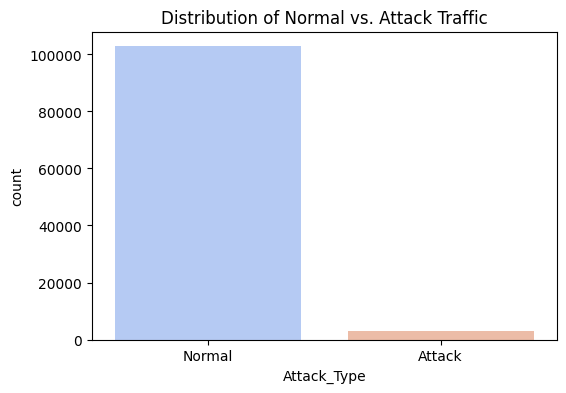

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Normal vs Attack Traffic
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attack_Type"], palette="coolwarm")
plt.xticks([0, 1], ["Normal", "Attack"])
plt.title("Distribution of Normal vs. Attack Traffic")
plt.show()


## ***Handling Imbalance using SMOTE***

In [52]:
import numpy as np

# Check for infinity values
print("Infinite values in dataset:", np.isinf(X).sum().sum())

# Check for NaN values
print("NaN values in dataset:", X.isna().sum().sum())

# Check for extremely large values
print("Max value in dataset:", X.max().max())


Infinite values in dataset: 226
NaN values in dataset: 0
Max value in dataset: inf


In [53]:
# Replace infinite values with the max finite value of the column
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with column median (to avoid bias)
X.fillna(X.median(numeric_only=True), inplace=True)

# Verify that there are no more infinite or NaN values
print("Infinite values after fix:", np.isinf(X).sum().sum())
print("NaN values after fix:", X.isna().sum().sum())


Infinite values after fix: 0
NaN values after fix: 0


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
y = df["Attack_Type"]

# Split dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio as needed
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_smote).value_counts())


Before SMOTE:
 Attack_Type
0    82259
1     2505
Name: count, dtype: int64
After SMOTE:
 Attack_Type
0    82259
1    41129
Name: count, dtype: int64


<ipython-input-56-4013f870e1d5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


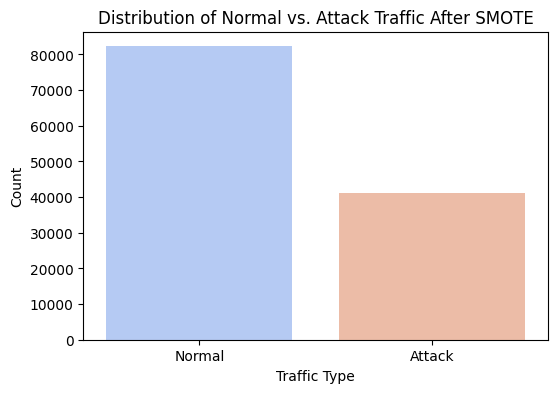

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert y_train_smote to a DataFrame
smote_distribution = pd.DataFrame({"Attack_Type": y_train_smote})
class_counts = smote_distribution["Attack_Type"].value_counts()

# Plot the class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")

# Labeling
plt.xticks([0, 1], ["Normal", "Attack"])
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.title("Distribution of Normal vs. Attack Traffic After SMOTE")
plt.show()
